# **Codes With Charts/Graphs/Tables**

### **Accessing Data**

In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#reading transaction-data-adhoc-analysis file

df = pd.read_json("transaction-data-adhoc-analysis.json")

### **Price DataFrame: Getting Price Per Item**

In [3]:
#getting transaction_date, transaction_items, and transaction_value columns from original dataframe
single_item_transaction_list = pd.DataFrame().assign(Month=df["transaction_date"], Items=df['transaction_items'], Sale=df['transaction_value'])

#only keeping entries with 1 kind of purchased item (i.e., transaction has no semicolon)
single_item_transaction_list = single_item_transaction_list[~single_item_transaction_list["Items"].str.contains(";")]

#date into year-month
single_item_transaction_list['Month'] = pd.DatetimeIndex(single_item_transaction_list['Month'])
single_item_transaction_list['Month'] = single_item_transaction_list['Month'].dt.to_period('M')

#splitting transaction_items into separate columns and putting two columns together
single_item_transaction_list[["Brand", "Item", "Quantity"]] = single_item_transaction_list["Items"].str.split(",", expand=True)
single_item_transaction_list["Product"] = single_item_transaction_list["Brand"] + " | " + single_item_transaction_list["Item"]
single_item_transaction_list.drop(columns = ["Items", "Brand", "Item"], inplace=True)

#removing parenthesis and x from quantity column and converting quantity column into int
single_item_transaction_list["Quantity"].replace('(\D)','',inplace=True, regex=True)
single_item_transaction_list["Quantity"] = single_item_transaction_list["Quantity"].astype(int)

#dividing transaction value by quantity to get item price
single_item_transaction_list["Item Price"] = single_item_transaction_list["Sale"]//single_item_transaction_list["Quantity"]

#keeping only product and item price
price_list = single_item_transaction_list[["Product", "Item Price"]]

#drop duplicates so there is only one copy of each item and price
price_list = price_list.drop_duplicates()

### **Transactions DataFrame: Cleaning Data and Adding Months**

In [4]:
#getting transaction_date and transaction_items columns from original dataframe
transaction_list = pd.DataFrame().assign(Month=df["transaction_date"], Items=df['transaction_items'])

#date into year-month
transaction_list['Month'] = pd.DatetimeIndex(transaction_list['Month'])
transaction_list['Month'] = transaction_list['Month'].dt.to_period('M')

#splitting data entries with ; into separate entries
transaction_list["Items"] = transaction_list["Items"].str.split(";").fillna(transaction_list["Items"])
transaction_list = transaction_list.explode("Items", ignore_index=True)

#splitting transaction_items into separate columns and putting two columns together
transaction_list[["Brand", "Item", "Quantity"]] = transaction_list["Items"].str.split(",", expand=True)
transaction_list["Product"] = transaction_list["Brand"] + " | " + transaction_list["Item"]
transaction_list.drop(columns = ["Items", "Brand", "Item"], inplace=True)

#removing parenthesis and x from quantity column and converting quantity column into int
transaction_list["Quantity"].replace('(\D)','',inplace=True, regex=True)
transaction_list["Quantity"] = transaction_list["Quantity"].astype(int)

#putting 2 dataframes together based on common column
transaction_list = pd.merge(transaction_list, price_list, on ="Product")

#getting sales value per transaction
transaction_list["Sales Value"] = transaction_list["Quantity"] * transaction_list["Item Price"]

### **Customer DataFrame**

In [5]:
#getting name, email, birthdate, and gender columns from original dataframe
customer_list = pd.DataFrame().assign(Name=df["name"], 
                                      Email=df['mail'], 
                                      Birthdate=df['birthdate'], 
                                      Gender=df['sex'])

#birthdate column dtype into date dtype
customer_list['Birthdate'] = pd.DatetimeIndex(customer_list['Birthdate'])

#drop duplicates to only keep one copy of customer information per customer
customer_list = customer_list.drop_duplicates()

### **Customer Activity DataFrame**

In [6]:
#getting transaction_date and email columns from original dataframe
customer_activity_list = pd.DataFrame().assign(Month=df["transaction_date"], Email=df['mail'])

#date into year-month
customer_activity_list['Month'] = pd.DatetimeIndex(customer_activity_list['Month'])
customer_activity_list['Month'] = customer_activity_list['Month'].dt.to_period('M')

#drop duplicates to keep information on whether customer had at least one purchase for that month (since some customers have multiple purchases in a given month)
customer_activity_list = customer_activity_list.drop_duplicates()

### **Total Number of Items Sold**

In [7]:
Total_Quantity = transaction_list["Quantity"].sum()

Total_Quantity

415150

### **Total Sale Value**

In [8]:
Total_Sales = transaction_list["Sales Value"].sum()

Total_Sales

381152772

### **Number of Items Sold Per Item**

In [9]:
nispm = transaction_list.groupby(["Product"])["Quantity"].sum()

nispm

Product
Candy City | Gummy Worms              59319
Candy City | Orange Beans             59406
Exotic Extras | Beef Chicharon        59302
Exotic Extras | Kimchi and Seaweed    59390
HealthyKid 3+ | Gummy Vitamins        59576
HealthyKid 3+ | Nutrional Milk        58728
HealthyKid 3+ | Yummy Vegetables      59429
Name: Quantity, dtype: int32

### **Total Sale Per Item**

In [10]:
tspm = transaction_list.groupby(["Product"])["Sales Value"].sum()

tspm

Product
Candy City | Gummy Worms                8897850
Candy City | Orange Beans              11821794
Exotic Extras | Beef Chicharon         77033298
Exotic Extras | Kimchi and Seaweed     47452610
HealthyKid 3+ | Gummy Vitamins         89364000
HealthyKid 3+ | Nutrional Milk        116868720
HealthyKid 3+ | Yummy Vegetables       29714500
Name: Sales Value, dtype: int64

## **Charts/Graphs/Tables**

### **Count of Each Item Sold Per Month**

In [11]:
each_item_sold_per_month = transaction_list.groupby(["Month", "Product"])["Quantity"].sum()
each_item_sold_per_month = each_item_sold_per_month.reset_index()
ceispm = each_item_sold_per_month.pivot_table(values = ["Quantity"], index = "Product", columns = "Month")

ceispm

Quantity                                  \
Month                               2022-01 2022-02 2022-03 2022-04 2022-05   
Product                                                                       
Candy City | Gummy Worms               9559    9996    9986   10043    9801   
Candy City | Orange Beans              9774   10037    9611    9914    9964   
Exotic Extras | Beef Chicharon         9665   10001    9816    9890   10028   
Exotic Extras | Kimchi and Seaweed     9676    9949    9967    9921    9773   
HealthyKid 3+ | Gummy Vitamins         9681    9980   10145    9842    9948   
HealthyKid 3+ | Nutrional Milk         9727    9691    9876    9786    9881   
HealthyKid 3+ | Yummy Vegetables       9959   10256    9896    9861    9735   

                                            
Month                              2022-06  
Product                                     
Candy City | Gummy Worms              9934  
Candy City | Orange Beans            10106  
Exotic Extras | Beef Chicharon        9902  
Exotic Extras | Kimchi and Seaweed   10104  
HealthyKid 3+ | Gummy Vitamins        9980  
HealthyKid 3+ | Nutrional Milk        9767  
HealthyKid 3+ | Yummy Vegetables      9722

### **Total Sale Value Per Item Per Month**

In [12]:
sale_value_per_item_per_month = transaction_list.groupby(["Month", "Product"])["Sales Value"].sum()
sale_value_per_item_per_month = sale_value_per_item_per_month.reset_index()
svpipm = sale_value_per_item_per_month.pivot_table(values = ["Sales Value"], index = "Product", columns = "Month")

svpipm

Sales Value                                \
Month                                  2022-01   2022-02   2022-03   2022-04   
Product                                                                        
Candy City | Gummy Worms               1433850   1499400   1497900   1506450   
Candy City | Orange Beans              1945026   1997363   1912589   1972886   
Exotic Extras | Beef Chicharon        12554835  12991299  12750984  12847110   
Exotic Extras | Kimchi and Seaweed     7731124   7949251   7963633   7926879   
HealthyKid 3+ | Gummy Vitamins        14521500  14970000  15217500  14763000   
HealthyKid 3+ | Nutrional Milk        19356730  19285090  19653240  19474140   
HealthyKid 3+ | Yummy Vegetables       4979500   5128000   4948000   4930500   

                                                        
Month                                2022-05   2022-06  
Product                                                 
Candy City | Gummy Worms             1470150   1490100  
Candy City | Orange Beans            1982836   2011094  
Exotic Extras | Beef Chicharon      13026372  12862698  
Exotic Extras | Kimchi and Seaweed   7808627   8073096  
HealthyKid 3+ | Gummy Vitamins      14922000  14970000  
HealthyKid 3+ | Nutrional Milk      19663190  19436330  
HealthyKid 3+ | Yummy Vegetables     4867500   4861000

### **Repeaters/Inactive/Engaged Customer Activity**

In [13]:
#accumulating customer transactions
activity_list = pd.crosstab(customer_activity_list["Email"], customer_activity_list["Month"])
for month_prev, month_next in zip(activity_list.columns, activity_list.columns[1:]):
    activity_list[month_next] = (activity_list[month_next] + activity_list[month_prev]) * activity_list[month_next]

#repeaters customer transactions
repeaters_activity_list = activity_list.copy()
for month_prev, month_next in zip(repeaters_activity_list.columns, repeaters_activity_list.columns[1:]):
    repeaters_activity_list[month_next] = repeaters_activity_list[month_next] > 1
repeaters_activity_list = repeaters_activity_list.sum()

#inactive customer transactions
inactive_activity_list = activity_list.copy()
inactive_activity_list = inactive_activity_list.replace(0,-len(inactive_activity_list.columns))
for month_prev, month_next in zip(inactive_activity_list.columns, inactive_activity_list.columns[1:]):
    inactive_activity_list[month_next] = inactive_activity_list[month_prev] > inactive_activity_list[month_next]
inactive_activity_list = inactive_activity_list.sum()

#engaged customer transactions
engaged_activity_list = pd.melt(activity_list)\
    .groupby('Month')['value']\
    .value_counts()\
    .unstack(level=0)\
    .fillna(0)\
    .drop(0)\
    .astype(int)
engaged_activity_list = pd.Series(np.diag(engaged_activity_list), engaged_activity_list.columns)

#final categorized customer transactions
repeaters_inactive_engaged = pd.DataFrame({'Repeaters': repeaters_activity_list,
                                           'Inactive': inactive_activity_list,
                                           'Engaged': engaged_activity_list})
repeaters_inactive_engaged.iloc[0] = 0
repeaters_inactive_engaged_proper = repeaters_inactive_engaged.T
repeaters_inactive_engaged_proper

Month,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
Repeaters,0,5275,5331,5296,5237,5320
Inactive,0,1525,1991,2055,2057,1964
Engaged,0,5275,4169,3304,2655,2159


### **Amount of Products Sold Per Month**

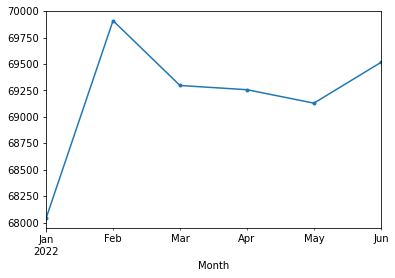

In [14]:
items_sold_per_month = transaction_list.groupby(["Month"])["Quantity"].sum()
items_sold_per_month_graph = items_sold_per_month.plot(kind="line", marker = '.')
plt.show()

### **Amount of Products Sold Per Item**

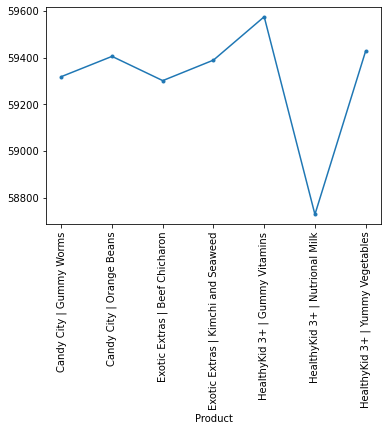

In [15]:
nispm_graph = nispm.plot(kind="line", marker = '.')
nispm_graph = plt.xticks(rotation=90)
plt.show()

### **Sales Per Month**

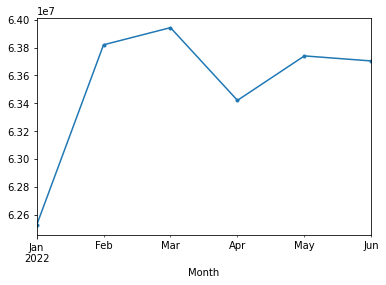

In [16]:
sales_per_month = transaction_list.groupby(["Month"])["Sales Value"].sum()
sales_per_month_graph = sales_per_month.plot(kind='line', marker = '.')
plt.show()

### **Sales Per Item**

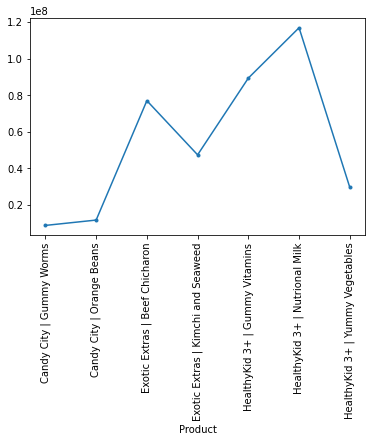

In [17]:
tspm_graph = tspm.plot(kind="line", marker = '.')
nispm_graph = plt.xticks(rotation=90)
plt.show()

### **Number of Transactions Per Month**

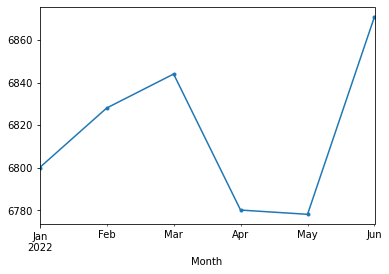

In [18]:
number_of_monthly_transactions = customer_activity_list.groupby(["Month"])["Email"].count()
number_of_monthly_transactions_graph = number_of_monthly_transactions.plot(kind='line',marker = '.')
plt.show()

### **Customer Activity Graph**

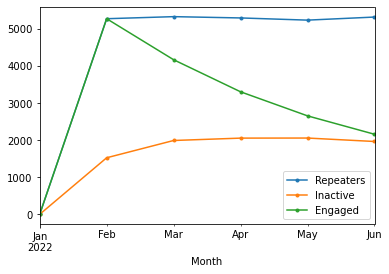

In [19]:
rie_customer_activity_graph = repeaters_inactive_engaged.plot(kind='line',marker = '.')
plt.show()

### **Total Number of Male and Female Customers**

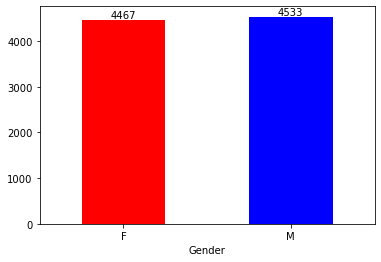

In [20]:
customer_list_gender = customer_list.groupby('Gender')['Name'].count()
customer_list_gender_graph = customer_list_gender.plot(kind="bar", color=["red","blue"])
customer_list_gender_graph = customer_list_gender_graph.bar_label(customer_list_gender_graph.containers[0])
customer_list_age_graph = plt.xticks(rotation=0)

### **Number of Customers Within Each Age Group**

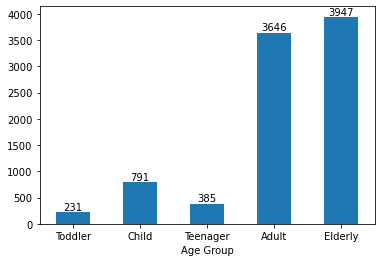

In [21]:
now = pd.Timestamp('now')
customer_list['Birthdate'] = pd.to_datetime(customer_list['Birthdate'], format='%m%d%y')
customer_list['Birthdate'] = customer_list['Birthdate'].where(customer_list['Birthdate'] < now, customer_list['Birthdate'] -  np.timedelta64(100, 'Y'))
customer_list['Age'] = (now - customer_list['Birthdate']).astype('timedelta64[Y]')
customer_list['Age'] = customer_list['Age'].astype(int)
customer_list["Age Group"] = pd.cut(customer_list.Age,bins=[-1,2,12,17,65,customer_list["Age"].max()+1],labels=["Toddler","Child","Teenager","Adult","Elderly"])

customer_list_age = customer_list.groupby('Age Group')['Name'].count()
customer_list_age_graph = customer_list_age.plot(kind="bar")
customer_list_age_graph = customer_list_age_graph.bar_label(customer_list_age_graph.containers[0])
customer_list_age_graph = plt.xticks(rotation=0)